In [1]:
from main import load_edgelist
from typing import List, Dict
from paco import TimeStampedLinkList, paco
from time import time
from tqdm import tqdm
import matplotlib.pyplot as plt
from baseline import create_temporal_network, get_total_causal_paths
import pandas as pd

In [2]:
dataset = pd.read_csv('soc-sign-bitcoinotc.csv', header=None)
dataset.columns = ['source', 'target', 'rating', 'timestamp']
edge_list = [(int(row['source']), int(row['target']), int(row['timestamp'])) for _, row in dataset.iterrows()]

In [3]:
data = TimeStampedLinkList.from_edgelist(edge_list)

In [4]:
# delta, K
fixed_k_config = [
    (1, 3),
    (2, 3),
    (3, 3),
    (5, 3),
    (10, 3),
    (15, 3)
]

## PaCo

In [5]:
def execute_paco(delta, k):
    start = time()
    C = paco(data, delta, k)
    end = time()
    
    count = sum(C.values())
    return count, end-start

In [6]:
results = []
for delta_sec, k in tqdm(fixed_k_config):
    result = execute_paco(delta_sec, k)
    results.append(result)

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 11.16it/s]


In [7]:
#runtimes_min = [runtime_sec / 60 for _, runtime_sec in results]
#deltas_min = [delta_sec / 60 for delta_sec, _ in fixed_k_config]
_, paco_runtimes_sec = zip(*results)
paco_deltas_sec, _ = zip(*fixed_k_config)

## Baseline

In [8]:
t = create_temporal_network(edge_list)

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 35592/35592 [00:01<00:00, 31383.50it/s]


In [9]:
results = []
for delta_sec, k in tqdm(fixed_k_config):
    result = get_total_causal_paths(t, delta_sec, k)
    results.append(result)

  0%|                                                                                                                                                                                         | 0/6 [00:00<?, ?it/s]

2023-12-17 23:52:53 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:52:53 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		71009
Roots:		35417
Leaves:		35542
Links:		35592
Acyclic:	None

2023-12-17 23:52:53 [Severity.INFO]	Generating causal trees for 35417 root nodes ...
2023-12-17 23:52:54 [Severity.INFO]	finished.


 17%|█████████████████████████████▌                                                                                                                                                   | 1/6 [00:01<00:05,  1.08s/it]

Number of causal paths: Total path count: 		35542.0 
[Unique / Sub paths / Total]: 	[35542.0 / 71234.0 / 106776.0]
Nodes:				5881 
Edges:				35592
Max. path length:		2
Avg path length:		1.001406786337291 
Paths of length k = 0		0.0 [ 0.0 / 71134.0 / 71134.0 ]
Paths of length k = 1		35492.0 [ 35492.0 / 100.0 / 35592.0 ]
Paths of length k = 2		50.0 [ 50.0 / 0.0 / 50.0 ]


2023-12-17 23:52:54 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:52:54 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		106544
Roots:		35362
Leaves:		71077
Links:		71184
Acyclic:	None

2023-12-17 23:52:54 [Severity.INFO]	Generating causal trees for 35362 root nodes ...
2023-12-17 23:52:55 [Severity.INFO]	finished.


 33%|███████████████████████████████████████████████████████████                                                                                                                      | 2/6 [00:02<00:05,  1.26s/it]

Number of causal paths: Total path count: 		35487.0 
[Unique / Sub paths / Total]: 	[35487.0 / 71289.0 / 106776.0]
Nodes:				5881 
Edges:				35592
Max. path length:		2
Avg path length:		1.0029588299940824 
Paths of length k = 0		0.0 [ 0.0 / 71079.0 / 71079.0 ]
Paths of length k = 1		35382.0 [ 35382.0 / 210.0 / 35592.0 ]
Paths of length k = 2		105.0 [ 105.0 / 0.0 / 105.0 ]


2023-12-17 23:52:55 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:52:56 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		142082
Roots:		35310
Leaves:		106615
Links:		106776
Acyclic:	None

2023-12-17 23:52:56 [Severity.INFO]	Generating causal trees for 35310 root nodes ...
2023-12-17 23:52:56 [Severity.INFO]	Analyzing tree 3531/35310 ...
2023-12-17 23:52:56 [Severity.INFO]	Analyzing tree 7062/35310 ...
2023-12-17 23:52:56 [Severity.INFO]	Analyzing tree 10593/35310 ...
2023-12-17 23:52:57 [Severity.INFO]	Analyzing tree 14124/35310 ...
2023-12-17 23:52:57 [Severity.INFO]	Analyzing tree 17655/

 50%|████████████████████████████████████████████████████████████████████████████████████████▌                                                                                        | 3/6 [00:04<00:04,  1.57s/it]

2023-12-17 23:52:57 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:52:58 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		213150
Roots:		35213
Leaves:		177683
Links:		177960
Acyclic:	None

2023-12-17 23:52:58 [Severity.INFO]	Generating causal trees for 35213 root nodes ...
2023-12-17 23:52:59 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		35338.0 
[Unique / Sub paths / Total]: 	[35338.0 / 71441.0 / 106779.0]
Nodes:				5881 
Edges:				35592
Max. path length:		2
Avg path length:		1.0072160280717641 
Paths of length k = 0		0.0 [ 0.0 / 70931.0 / 70931.0 ]
Paths of length k = 1		35083.0 [ 35083.0 / 510.0 / 35593.0 ]
Paths of length k = 2		255.0 [ 255.0 / 0.0 / 255.0 ]




 67%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                           | 4/6 [00:06<00:03,  1.88s/it]

2023-12-17 23:53:00 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:02 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		390688
Roots:		34904
Leaves:		355221
Links:		355920
Acyclic:	None

2023-12-17 23:53:02 [Severity.INFO]	Generating causal trees for 34904 root nodes ...
2023-12-17 23:53:03 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		35030.0 
[Unique / Sub paths / Total]: 	[35030.0 / 71753.0 / 106783.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0161004852983158 
Paths of length k = 0		0.0 [ 0.0 / 70624.0 / 70624.0 ]
Paths of length k = 1		34467.0 [ 34467.0 / 1127.0 / 35594.0 ]
Paths of length k = 2		562.0 [ 562.0 / 2.0 / 564.0 ]
Paths of length k = 3		1.0 [ 1.0 / 0.0 / 1.0 ]




 83%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                             | 5/6 [00:10<00:02,  2.49s/it]

2023-12-17 23:53:03 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:53:07 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		568131
Roots:		34586
Leaves:		532664
Links:		533880
Acyclic:	None

2023-12-17 23:53:07 [Severity.INFO]	Generating causal trees for 34586 root nodes ...
2023-12-17 23:53:08 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		34713.0 
[Unique / Sub paths / Total]: 	[34713.0 / 72075.0 / 106788.0]
Nodes:				5881 
Edges:				35592
Max. path length:		3
Avg path length:		1.0254083484573502 
Paths of length k = 0		0.0 [ 0.0 / 70308.0 / 70308.0 ]
Paths of length k = 1		33834.0 [ 33834.0 / 1761.0 / 35595.0 ]
Paths of length k = 2		876.0 [ 876.0 / 6.0 / 882.0 ]
Paths of length k = 3		3.0 [ 3.0 / 0.0 / 3.0 ]




100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:15<00:00,  2.61s/it]


In [10]:
_, baseline_runtimes_sec = zip(*results)
baseline_deltas_sec, _ = zip(*fixed_k_config)

In [11]:
get_total_causal_paths(t, 120, 3)

2023-12-17 23:53:08 [Severity.INFO]	Constructing time-unfolded DAG ...
2023-12-17 23:54:02 [Severity.INFO]	finished.
Directed Acyclic Graph
Nodes:		4258126
Roots:		29762
Leaves:		4222659
Links:		4271040
Acyclic:	None

2023-12-17 23:54:02 [Severity.INFO]	Generating causal trees for 29762 root nodes ...
2023-12-17 23:54:11 [Severity.INFO]	finished.
Number of causal paths: Total path count: 		30072.0 
[Unique / Sub paths / Total]: 	[30072.0 / 77662.0 / 107734.0]
Nodes:				5881 
Edges:				35592
Max. path length:		6
Avg path length:		1.1923051343442406 
Paths of length k = 0		0.0 [ 0.0 / 65927.0 / 65927.0 ]
Paths of length k = 1		24429.0 [ 24429.0 / 11426.0 / 35855.0 ]
Paths of length k = 2		5528.0 [ 5528.0 / 255.0 / 5783.0 ]
Paths of length k = 3		93.0 [ 93.0 / 47.0 / 140.0 ]
Paths of length k = 4		20.0 [ 20.0 / 5.0 / 25.0 ]
Paths of length k = 5		1.0 [ 1.0 / 2.0 / 3.0 ]
Paths of length k = 6		1.0 [ 1.0 / 0.0 / 1.0 ]




(41778.0, 63.71399402618408)

## Plots

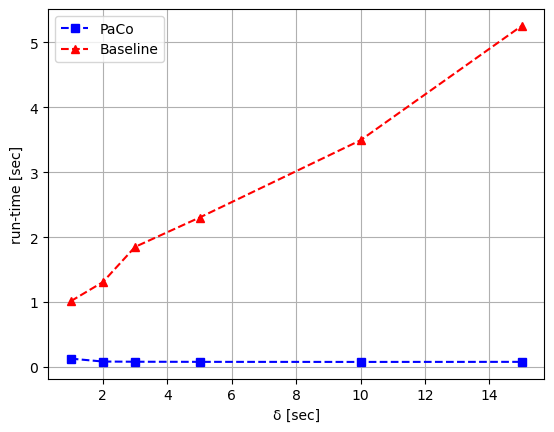

In [12]:
plt.plot(paco_deltas_sec, paco_runtimes_sec, 's--', color='blue',label="PaCo")
plt.plot(baseline_deltas_sec, baseline_runtimes_sec, '^--', color='red',label="Baseline")
plt.xlabel("δ [sec]")
plt.ylabel("run-time [sec]")
plt.grid(True)
plt.legend()
plt.savefig('plots/socbitcoin_middle_panel.png')
plt.show()